## Collecting and Reding the Data

In [124]:
import pandas as pd
df=pd.read_csv('xgboost ass//Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
# 'Age' ,Cabin and Embarked has null elemts 
# age --> null --> mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

# where cabin and embraked are unwanted columns so droping them
df.drop(df[['Cabin','Embarked','Name','Ticket']],axis=1,inplace=True)
df



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000
887,888,1,1,female,19.000000,0,0,30.0000
888,889,0,3,female,29.699118,1,2,23.4500
889,890,1,1,male,26.000000,0,0,30.0000


In [117]:
# checking any duplicate columns
df[df.duplicated()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


In [118]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

## Exploratory Data Analysis(EDA)

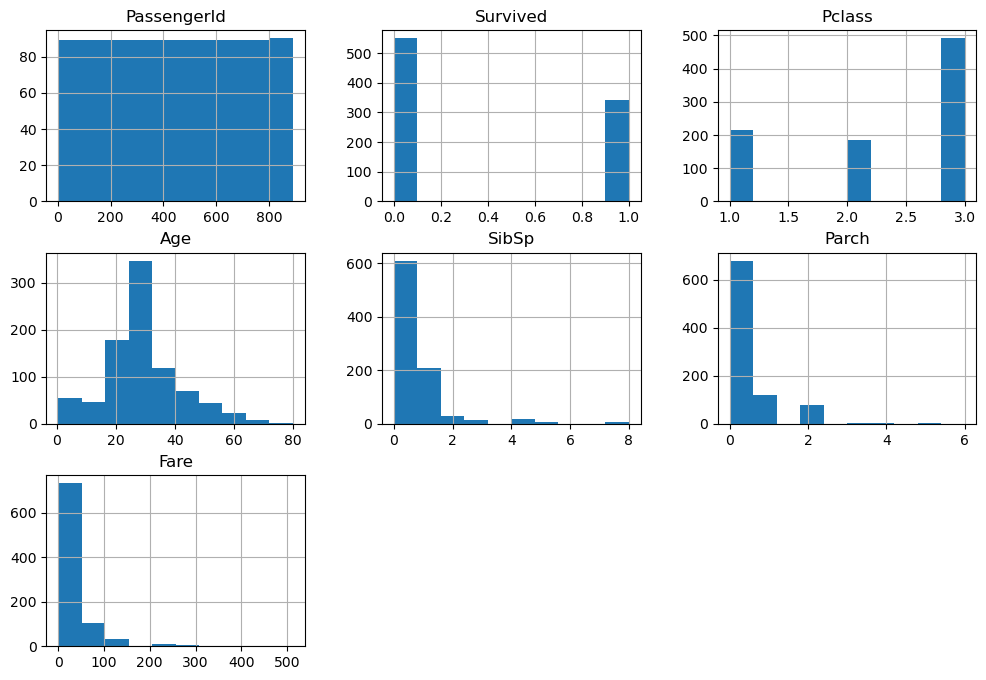

<Axes: >

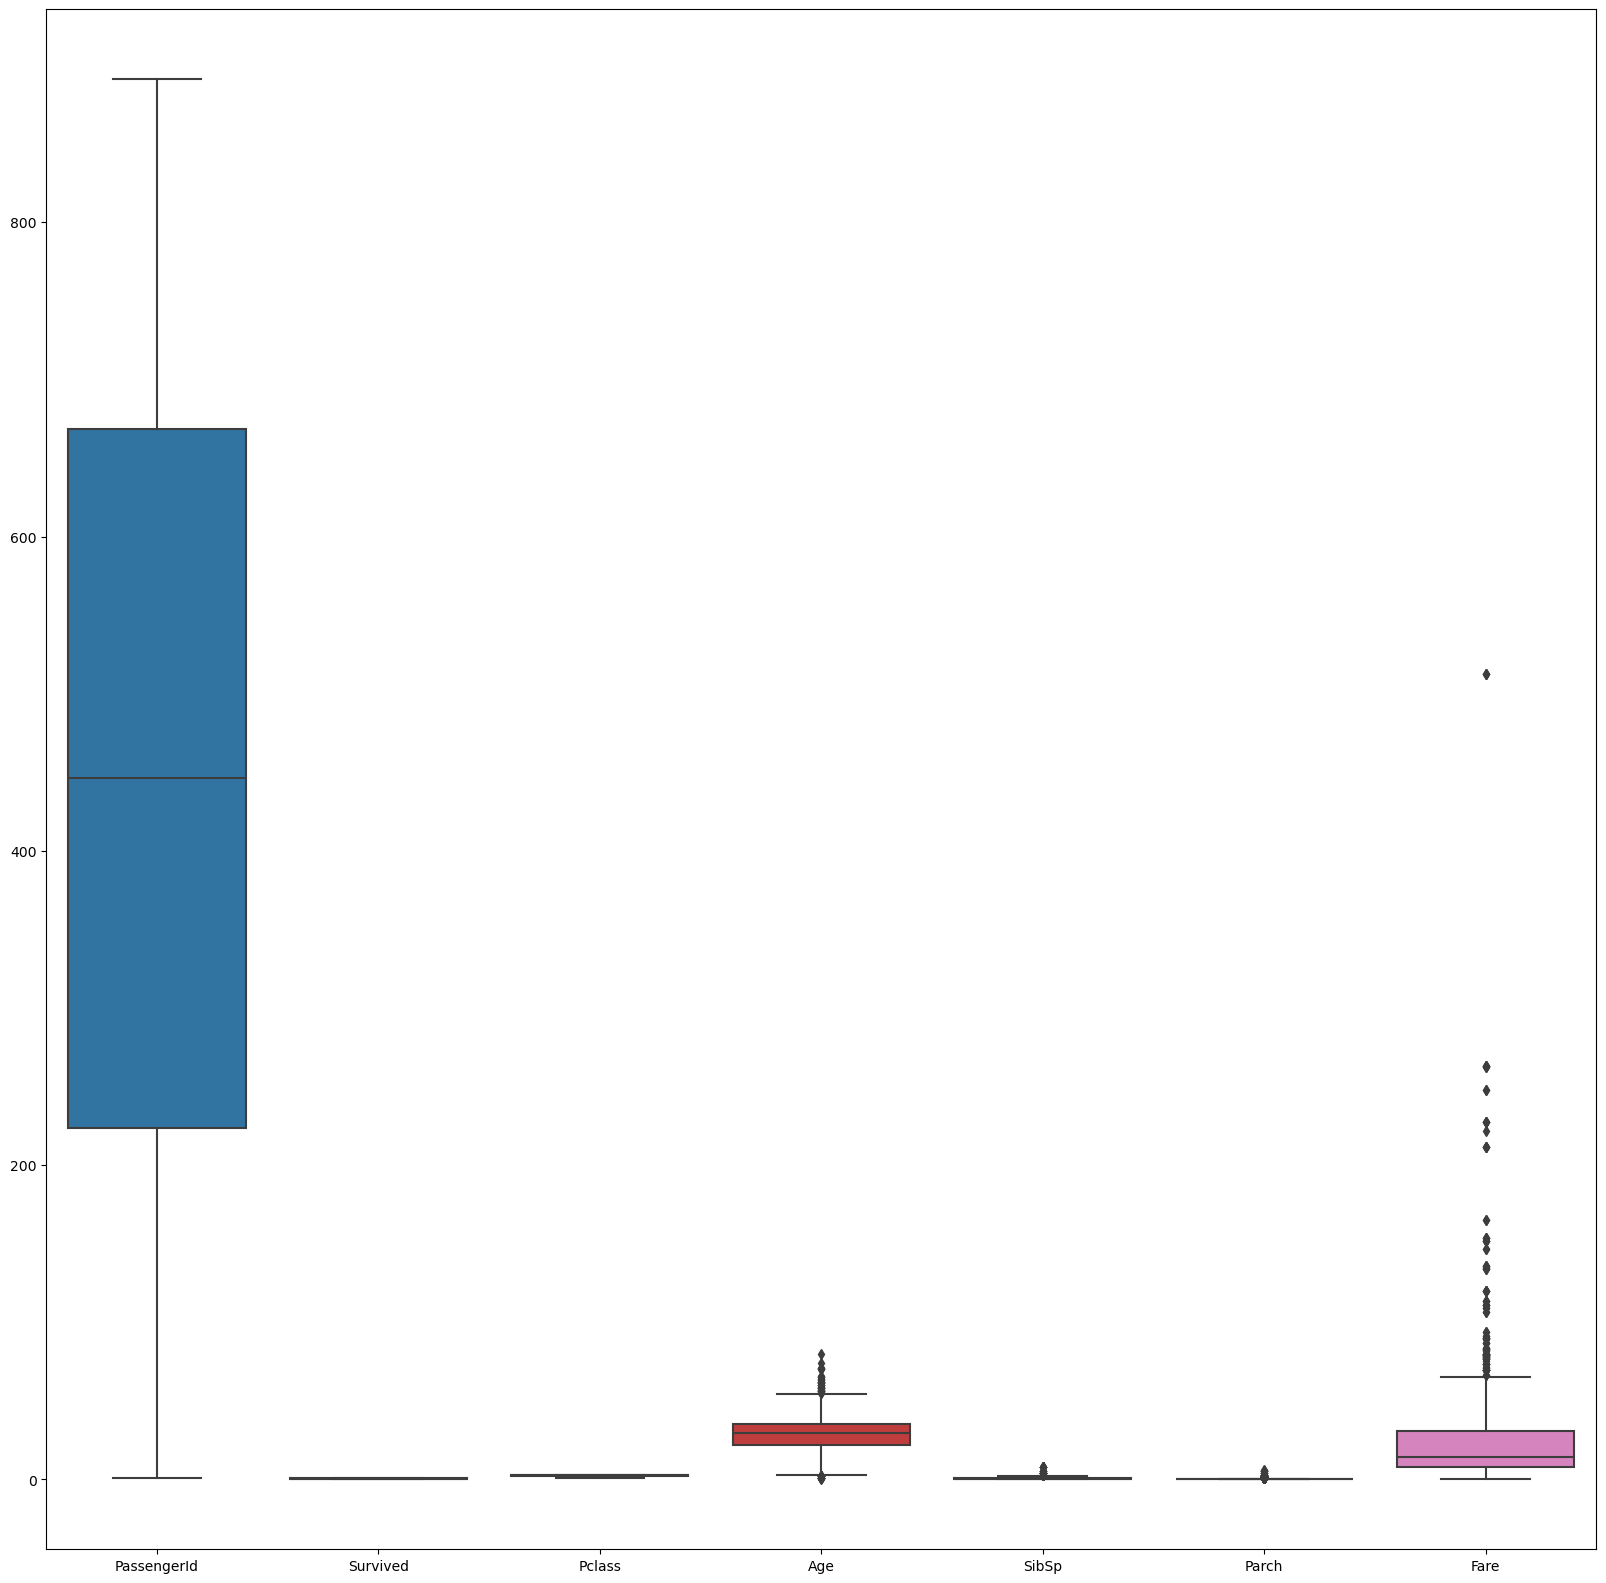

In [119]:
# data visualization

 # Histogrtam

import matplotlib.pyplot as plt
df.hist(figsize=(12,8))
plt.show()


# box-plot

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax)


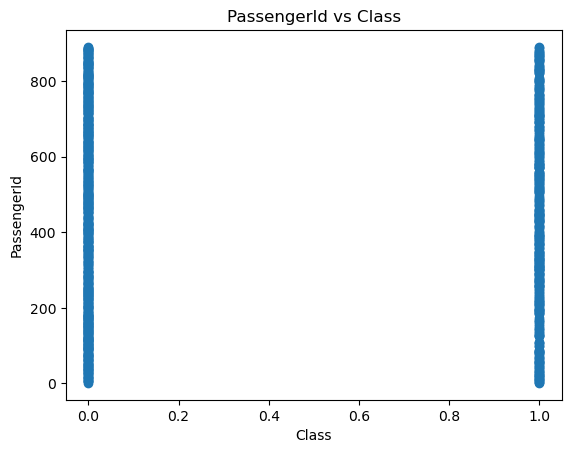

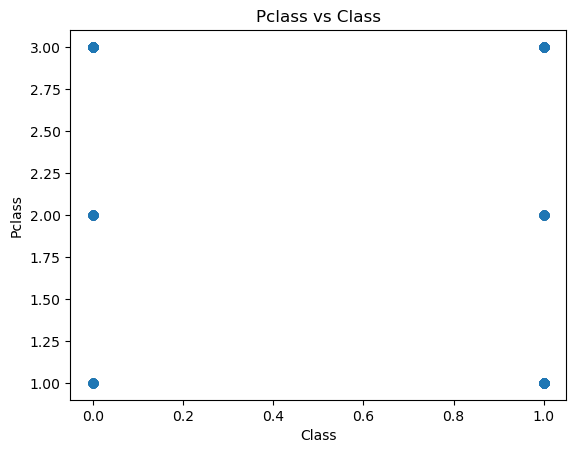

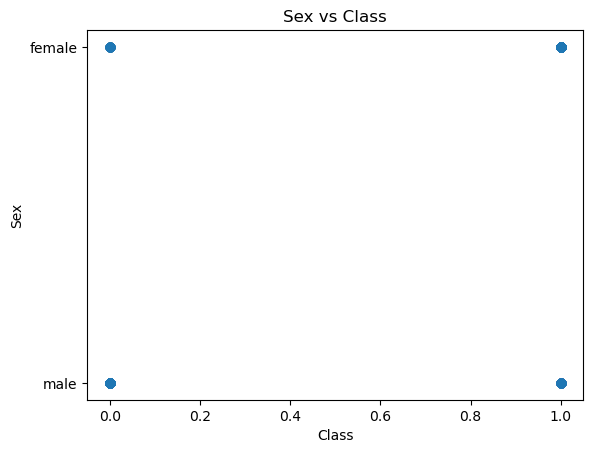

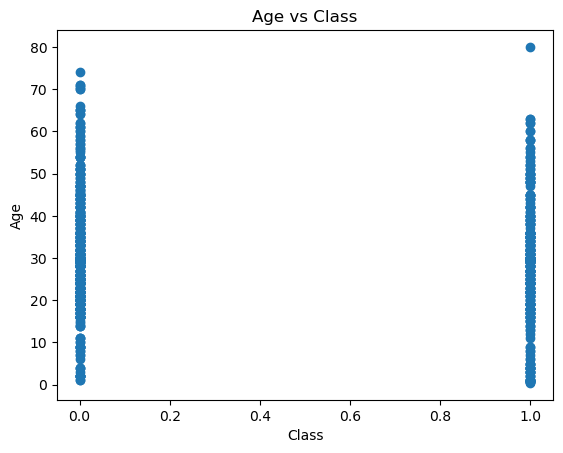

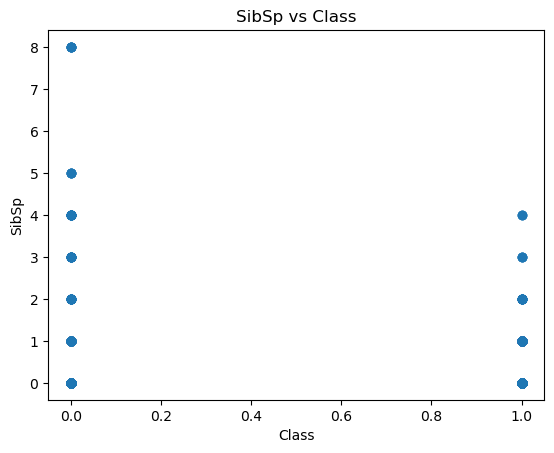

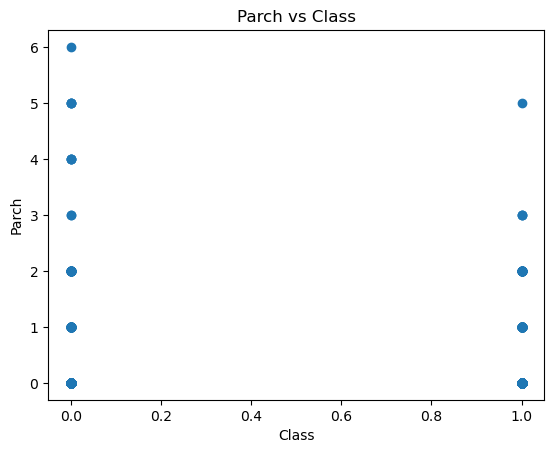

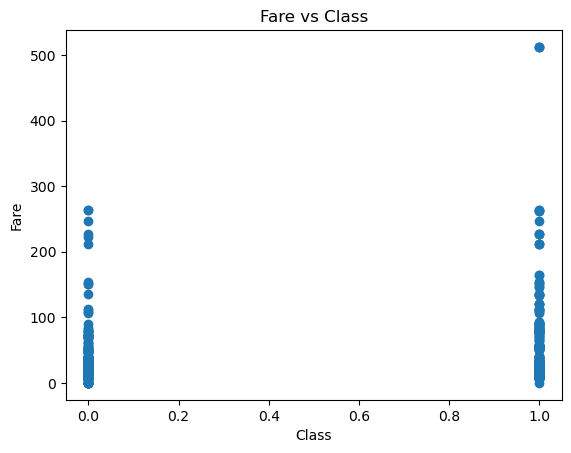

In [121]:
# Scatter plot
import numpy as np
import matplotlib.pyplot as plt
Y=df['Survived']

X=pd.concat([df['PassengerId'],df.iloc[:,2:8]],axis=1)

#Get all columns except the target column
columns = X.columns[:]
columns

# Create a scatter plot for each column
for i in columns:
    plt.scatter(Y,X[i])
    # plt.plot(X[i],Y,color='Gray')
    plt.ylabel(f'{i}')
    plt.xlabel("Class")
    plt.title(f'{i} vs Class')
    plt.show()


## DATA Processing

In [122]:
X.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [128]:
# Encoding
# converting the object type column to int column

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [95]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [97]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

## XGBoosting

In [ ]:
Standard GBM implementation has no regularization like XGBoost; therefore, it also helps to reduce overfitting. 
In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

What are XGBoost Parameters?
The overall parameters have been divided into 3 categories by XGBoost authors:

General Parameters: Guide the overall functioning
Booster Parameters: Guide the individual booster (tree/regression) at each step
Learning Task Parameters: Guide the optimization performed

In [102]:

Y=df['Survived']
X=pd.concat([df['PassengerId'],df.iloc[:,2:8]],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from xgboost import XGBClassifier
dt_model = XGBClassifier(gamma=10,reg_lambda=4,n_estimators=100)

training_error = []
test_error = []
test_accuracy_score = []
test_precision_score = []
test_f1_score = []
test_recall_score = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
    
    # test_precision_score.append(precision_score(Y_test,Y_pred_test,average='weighted',labels=np.unique(Y_pred_test)))
    
    # test_recall_score.append(recall_score(Y_test,Y_pred_test,average='weighted',labels=np.unique(Y_pred_test)))
    
    # test_f1_score.append(f1_score(Y_test, Y_pred_test, average='weighted'))

    test_precision_score.append(precision_score(Y_test, Y_pred_test, average='weighted'))
    test_recall_score.append(recall_score(Y_test, Y_pred_test, average='weighted'))
    test_f1_score.append(f1_score(Y_test, Y_pred_test, average='weighted'))


    test_accuracy_score.append(accuracy_score(Y_test, Y_pred_test))
print("xgb-Cross validation Training error: ", np.mean(training_error).round(2))
print("xgb-Cross validation Test error: ", np.mean(test_error).round(2))
print("Variance:", np.mean(test_error) - np.mean(training_error))

print("CV- Test prescision score: ",np.mean(test_precision_score).round(2))

print("CV- Test recall score: ",np.mean(test_recall_score).round(2))

print("CV- Test f1 score: ",np.mean(test_f1_score).round(2))

print("CV- Test accuray score: ",np.mean(test_accuracy_score).round(2))

xgb-Cross validation Training error:  0.44
xgb-Cross validation Test error:  0.46
Variance: 0.015777402481228164
CV- Test prescision score:  0.8
CV- Test recall score:  0.79
CV- Test f1 score:  0.78
CV- Test accuray score:  0.79


## HyperPermaters Tunning

In [104]:
# HyperPermaters Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(X_test, Y_test)
print("Test accuracy:", accuracy)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Test accuracy: 0.7873134328358209


## LightGBM

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

# Assuming df is your DataFrame
Y = df['Survived']
X = pd.concat([df['PassengerId'], df.iloc[:, 2:8]], axis=1)

# Initialize lists to store metrics
training_error = []
test_error = []
test_accuracy_score = []
test_precision_score = []
test_f1_score = []
test_recall_score = []

# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier(gamma=10, reg_lambda=4, n_estimators=100)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for train_index, test_index in cv.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    lgb_model.fit(X_train, Y_train)
    
    # Predict class labels
    Y_pred_train = lgb_model.predict(X_train)
    Y_pred_test = lgb_model.predict(X_test)
    
    # Calculate root mean squared error for training and test sets
    training_error.append(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
    
    # Calculate and store evaluation metrics
    test_accuracy_score.append(accuracy_score(Y_test, Y_pred_test))
    test_precision_score.append(precision_score(Y_test, Y_pred_test, average='weighted'))
    test_recall_score.append(recall_score(Y_test, Y_pred_test, average='weighted'))
    test_f1_score.append(f1_score(Y_test, Y_pred_test, average='weighted'))

# Print the evaluation results
print("LightGBM Cross-validation Training error: ", np.mean(training_error).round(2))
print("LightGBM Cross-validation Test error: ", np.mean(test_error).round(2))
print("Variance:", np.mean(test_error) - np.mean(training_error))
print("CV Test precision score: ", np.mean(test_precision_score).round(2))
print("CV Test recall score: ", np.mean(test_recall_score).round(2))
print("CV Test F1 score: ", np.mean(test_f1_score).round(2))
print("CV Test accuracy score: ", np.mean(test_accuracy_score).round(2))


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## for the above code i go output but during this process inital lines are showing something but at end you can find the answers

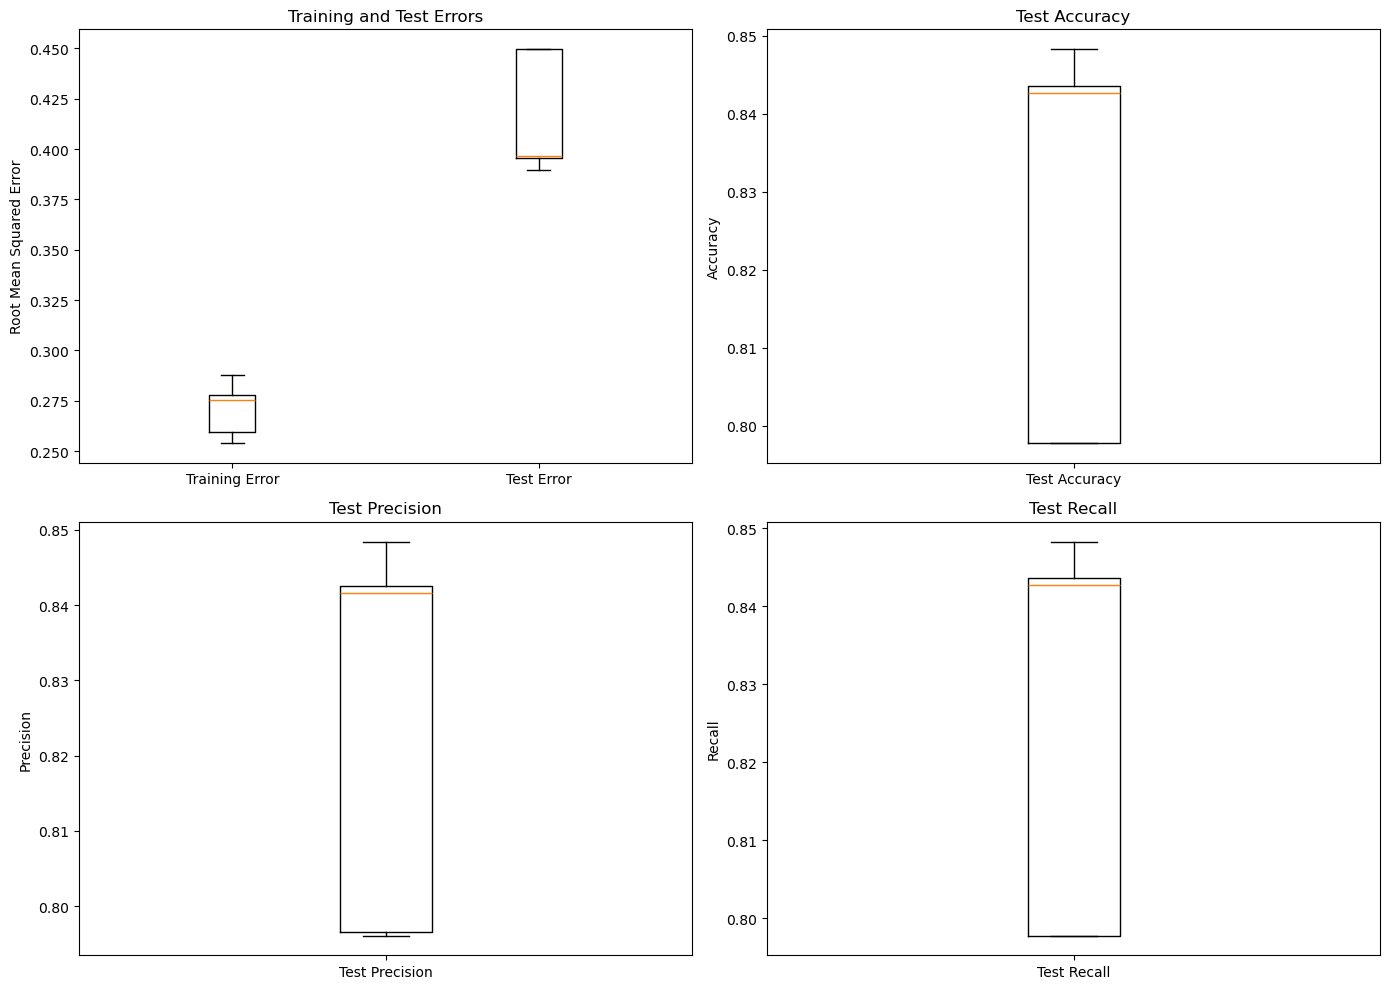

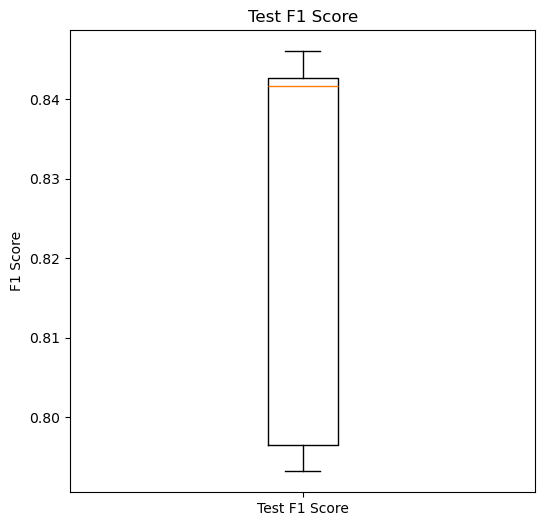

In [133]:
visualizing the results

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Box plot for Training and Test Errors
plt.subplot(2, 2, 1)
plt.boxplot([training_error, test_error], labels=['Training Error', 'Test Error'])
plt.title('Training and Test Errors')
plt.ylabel('Root Mean Squared Error')

# Box plot for Accuracy
plt.subplot(2, 2, 2)
plt.boxplot(test_accuracy_score, labels=['Test Accuracy'])
plt.title('Test Accuracy')
plt.ylabel('Accuracy')

# Box plot for Precision
plt.subplot(2, 2, 3)
plt.boxplot(test_precision_score, labels=['Test Precision'])
plt.title('Test Precision')
plt.ylabel('Precision')

# Box plot for Recall
plt.subplot(2, 2, 4)
plt.boxplot(test_recall_score, labels=['Test Recall'])
plt.title('Test Recall')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

# F1 Score plot separately for better visibility
plt.figure(figsize=(6, 6))
plt.boxplot(test_f1_score, labels=['Test F1 Score'])
plt.title('Test F1 Score')
plt.ylabel('F1 Score')
plt.show()
